In [56]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

In [57]:
df_examples = pd.read_csv(filepath_or_buffer="../data/df_examples.csv")
df_examples.shape

(4939, 33)

In [58]:
df_holdout = pd.read_csv(filepath_or_buffer="../data/df_holdout.csv")
df_holdout.shape

(100, 33)

In [59]:
df_examples.head()

,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,...,B_TOTAL_STR._success_percent,R_CLINCH_success_percent,B_CLINCH_success_percent,R_GROUND_success_percent,B_GROUND_success_percent,fight_mins,Result,day_of_week_,country_,win_by_
0,16.0,30.0,0.0,50.0,0,1,0,1,0,0,...,30.00,-1.00,-1.00,-1.0,-1.00,0.82,Blue,1,1,4
1,40.0,57.0,0.0,0.0,0,0,0,0,0,0,...,59.46,100.00,61.54,-1.0,-1.00,2.50,Blue,1,1,1
2,48.0,61.0,70.0,66.0,0,0,3,4,1,3,...,67.65,68.42,76.00,100.0,100.00,15.00,Blue,1,1,2
3,50.0,78.0,0.0,50.0,0,0,0,0,0,0,...,78.12,-1.00,100.00,-1.0,93.33,2.87,Blue,1,1,1
4,54.0,30.0,50.0,0.0,0,0,1,0,0,0,...,52.86,50.00,100.00,75.0,75.00,15.00,Red,1,1,2


In [60]:
df_examples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4939 entries, 0 to 4938
Data columns (total 33 columns):
R_SIG_STR_pct                   4939 non-null float64
B_SIG_STR_pct                   4939 non-null float64
R_TD_pct                        4939 non-null float64
B_TD_pct                        4939 non-null float64
R_SUB_ATT                       4939 non-null int64
B_SUB_ATT                       4939 non-null int64
R_PASS                          4939 non-null int64
B_PASS                          4939 non-null int64
R_REV                           4939 non-null int64
B_REV                           4939 non-null int64
R_KD_success_percent            4939 non-null float64
B_KD_success_percent            4939 non-null float64
R_TD_success_percent            4939 non-null float64
B_TD_success_percent            4939 non-null float64
R_HEAD_success_percent          4939 non-null float64
B_HEAD_success_percent          4939 non-null float64
R_BODY_success_percent          4939 non-

# Data Pre-processing and Modeling

In [61]:
features_to_drop = ['day_of_week_', 'country_', 'win_by_']
if features_to_drop:
    df_examples.drop(labels=features_to_drop, axis=1, inplace=True)
if features_to_drop:
    df_holdout.drop(labels=features_to_drop, axis=1, inplace=True)

### Decide how many components you want to use for PCA

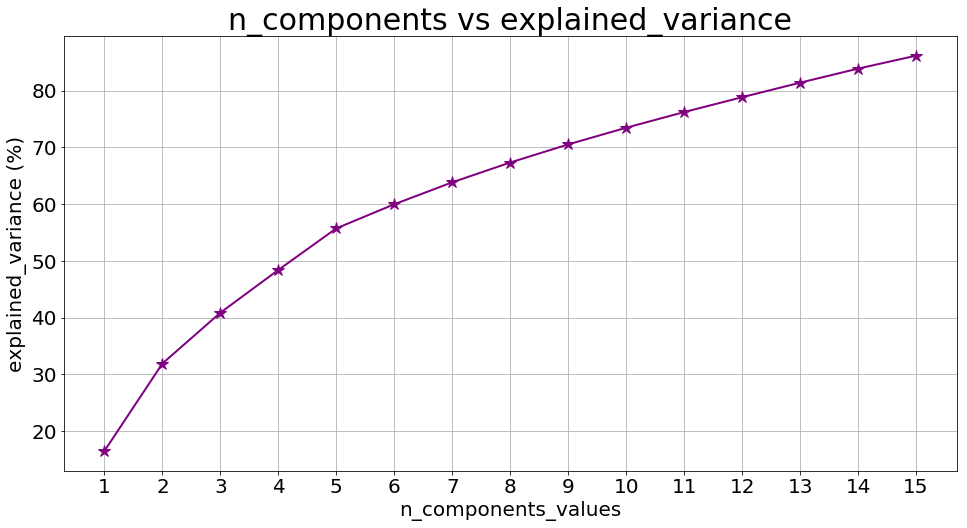

In [62]:
warnings.filterwarnings(action='ignore')
n_components_values = np.arange(1, 15+1, 1)
variances = list()
for n_value in n_components_values:
    X = df_examples.drop(labels='Result', axis=1)
    y = df_examples['Result'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    pca = PCA(n_components=n_value)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    explained_variance = pca.explained_variance_ratio_
    variance = round(explained_variance.sum() * 100, 2)
    variances.append(variance)

thickness = 2
plt.figure(figsize=(16,8))
plt.plot(n_components_values, variances, color='purple', linewidth=thickness, marker='*', ms=thickness*6)
plt.xlabel("n_components_values", fontsize=20)
plt.ylabel("explained_variance (%)", fontsize=20)
plt.xticks(n_components_values, fontsize=20)
plt.yticks(fontsize=20)
plt.title("n_components vs explained_variance", fontsize=30)
plt.grid()
plt.show()

### Use appropriate 'n' value for `n_components`. I decided to use n_components=5

In [63]:
X = df_examples.drop(labels='Result', axis=1)
y = df_examples['Result'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# pca = PCA(n_components=5)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

### Build classifier

In [64]:
# classifier = LogisticRegression(random_state=0)
classifier = RandomForestClassifier(max_depth=30, random_state=0)
# classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski', n_jobs=-1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("cm: {}\naccuracy: {}".format(cm, accuracy))

cm: [[223  80]
 [ 76 609]]
accuracy: 0.8421052631578947


### Make predictions on unseen data

In [65]:
df_holdout['Result'].value_counts()

Blue    51
Red     49
Name: Result, dtype: int64

In [66]:
# df_holdout = df_holdout.head(1)
df_holdout_X = df_holdout.drop(labels='Result', axis=1)

sc = StandardScaler()
X_holdout = sc.fit_transform(df_holdout_X)
y_pred = classifier.predict(X_holdout)

model_accuracy = accuracy_score(y_true=df_holdout['Result'].values, y_pred=y_pred, normalize=True) * 100
model_accuracy = round(model_accuracy, 2)
model_accuracy

76.0

In [67]:
cm = confusion_matrix(y_true=df_holdout['Result'].values, y_pred=y_pred)
cm

array([[30, 21],
       [ 3, 46]], dtype=int64)

In [68]:
def get_feature_importances(model, df):
    feature_column = 'Feature'
    importance_column = 'Importance_Percentage'
    data = {
        feature_column: df.columns,
        importance_column: model.feature_importances_
    }
    df_feature_importances = pd.DataFrame(data=data).sort_values(by=importance_column, ascending=False)
    df_feature_importances[importance_column] = df_feature_importances[importance_column] * 100
    df_feature_importances[importance_column] = df_feature_importances[importance_column].apply(round, args=[2])
    df_feature_importances.reset_index(drop=True, inplace=True)
    return df_feature_importances

In [69]:
# feat_importance = get_feature_importances(model=classifier, df=X)
# feat_importance.head(8)

if str(classifier.base_estimator_)[:22] == 'DecisionTreeClassifier':
    feat_importance = get_feature_importances(model=classifier, df=X)
    print(feat_importance.head(8))

                      Feature  Importance_Percentage
0        B_KD_success_percent                   7.43
1    R_GROUND_success_percent                   6.70
2      B_HEAD_success_percent                   6.67
3  R_SIG_STR._success_percent                   6.48
4    B_GROUND_success_percent                   6.05
5      R_HEAD_success_percent                   5.16
6  B_SIG_STR._success_percent                   4.68
7               B_SIG_STR_pct                   4.44


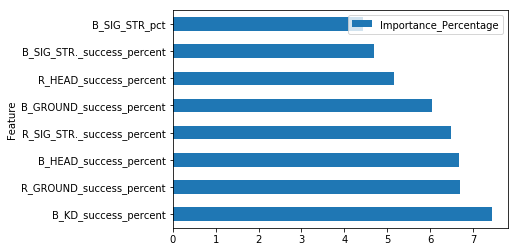

In [70]:
feat_importance.set_index(keys='Feature').head(8).plot(kind='barh')
plt.show()